In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sns.set()

### Defining Quadratic Assignment problem
 The objective of the Quadratic Assignment Problem (QAP) is to assign n facilities to n locations in such a way as to minimize the assignment cost. The assignment cost is the sum, over all pairs, of the flow between a pair of facilities multiplied by the distance between their assigned locations

In [2]:
# np.random.seed(789)

# facility = ['A','B','C','D','E','F','G','H','I','J']
# location = ['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10']

# size = len(facility)
# lower_idx = np.tril_indices(size, -1)

# distance =np.random.randint(10,30,(size,size))
# distance[lower_idx] = distance.T[lower_idx]
# np.fill_diagonal(distance, 0)

# frequency =np.random.randint(1,15,(size,size))
# frequency[lower_idx] = frequency.T[lower_idx]
# np.fill_diagonal(frequency, 0)

In [3]:
# distance_df = pd.DataFrame(index=location,columns=location,data=distance)
# distance_df

In [4]:
# frequency_df = pd.DataFrame(index=facility,columns=facility,data=frequency)
# frequency_df

In [5]:
facility = ['A','B','C','D','E','F','G','H',]
location = ['L1','L2','L3','L4','L5','L6','L7','L8']

distance_df = pd.DataFrame([[0,1,2,3,1,2,3,4],[1,0,1,2,2,1,2,3],[2,1,0,1,3,2,1,2],
                            [3,2,1,0,4,3,2,1],[1,2,3,4,0,1,2,3],[2,1,2,3,1,0,1,2],
                            [3,2,1,2,2,1,0,1],[4,3,2,1,3,2,1,0]],
                           columns=location,index=location)

frequency_df = pd.DataFrame([[0,5,2,4,1,0,0,6],[5,0,3,0,2,2,2,0],[2,3,0,0,0,0,0,5],
                             [4,0,0,0,5,2,2,10],[1,2,0,5,0,10,0,0],[0,2,0,2,10,0,5,1],
                             [0,2,0,2,0,5,0,10],[6,0,5,10,0,1,10,0]],
                            columns=facility,index=facility)

In [6]:
distance_df

,L1,L2,L3,L4,L5,L6,L7,L8
L1,0,1,2,3,1,2,3,4
L2,1,0,1,2,2,1,2,3
L3,2,1,0,1,3,2,1,2
L4,3,2,1,0,4,3,2,1
L5,1,2,3,4,0,1,2,3
L6,2,1,2,3,1,0,1,2
L7,3,2,1,2,2,1,0,1
L8,4,3,2,1,3,2,1,0


In [7]:
frequency_df

,A,B,C,D,E,F,G,H
A,0,5,2,4,1,0,0,6
B,5,0,3,0,2,2,2,0
C,2,3,0,0,0,0,0,5
D,4,0,0,0,5,2,2,10
E,1,2,0,5,0,10,0,0
F,0,2,0,2,10,0,5,1
G,0,2,0,2,0,5,0,10
H,6,0,5,10,0,1,10,0


In [8]:
size = len(facility)
lower_idx = np.tril_indices(size, -1)

In [9]:
initial_temp = 1000         # No of Iteration for Temperature change
outer_iter = 500
inner_iter = 50
alpha = 0.9                # Factor for decreasing the Temperature

In [10]:
# generate initial random solution
initial_sol = np.copy(facility)
np.random.shuffle(initial_sol)

initial_assign = frequency_df.reindex(index=initial_sol,columns=initial_sol)
initial_cost = distance_df.values * initial_assign.values
initial_cost = np.sum(initial_cost[lower_idx])

In [11]:
current_temp = initial_temp
current_sol = np.copy(initial_sol)
all_cost = []

for outer_loop in range(outer_iter):
    for inner_loop in range(inner_iter):
        position_1 = np.random.randint(size)
        position_2 = np.random.randint(size)
        
        while position_1 == position_2:
            position_2 = np.random.randint(size)
        
        new_sol = np.copy(current_sol)
        new_sol[position_2] = current_sol[position_1]
        new_sol[position_1] = current_sol[position_2]
        
        current_assign = frequency_df.reindex(index=current_sol,columns=current_sol)
        new_assign = frequency_df.reindex(index=new_sol,columns=new_sol)
        
        current_cost = distance_df.values * current_assign.values
        current_cost = np.sum(current_cost[lower_idx])
                              
        new_cost = distance_df.values * new_assign.values
        new_cost = np.sum(new_cost[lower_idx])
        
        prob_accept = 1/(np.exp(new_cost-current_cost)/current_temp)
        
        random_chance = np.random.rand()
        
        if new_cost <= current_cost:
            current_sol = np.copy(new_sol)
        elif random_chance <= prob_accept:
            current_sol = np.copy(new_sol)
        else:
            current_sol = current_sol
            
    all_cost.append(current_cost)
    current_temp = current_temp * alpha  
    
print('Initial Solutions {}'.format(initial_sol))
print('Initial cost {}'.format(initial_cost))

print('Final Solutions {}'.format(current_sol))
print('Final cost {}'.format(current_cost))

Initial Solutions ['C' 'B' 'G' 'F' 'E' 'H' 'A' 'D']
Initial cost 160
Final Solutions ['C' 'H' 'G' 'F' 'B' 'A' 'D' 'E']
Final cost 107


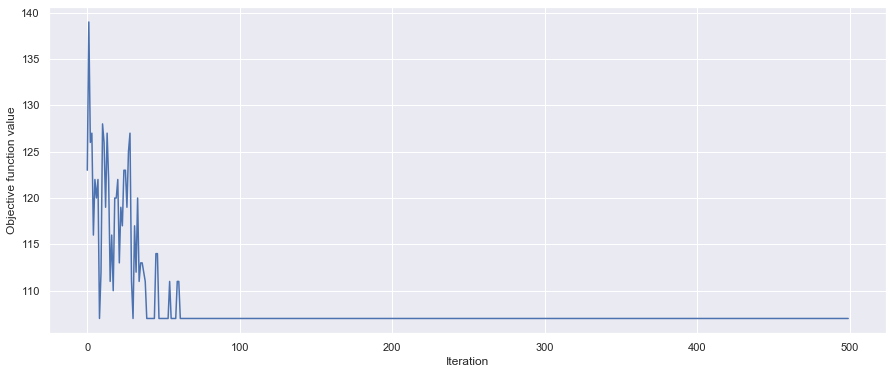

In [12]:
plt.figure(figsize=(15,6))
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.plot(range(outer_iter),all_cost)